In [ ]:
# Libary Required
import pandas as pd
from prophet import Prophet

In [ ]:
# Loading the Data set
df = pd.read_csv('NIFTY_50_2015-2023.csv')

# Converting 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Filter data from Covid
df = df[df['Date'] >= '2020-04-01']
df.head()

<ipython-input-4-7ef14b15c7f3>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
1086,2020-04-01,8584.10,8588.10,8198.35,8253.80,507509685.0,21307.30
1087,2020-04-03,8356.55,8356.55,8055.80,8083.80,697752438.0,26561.18
1088,2020-04-07,8446.30,8819.40,8360.95,8792.20,815245226.0,35206.69
1089,2020-04-08,8688.90,9131.70,8653.90,8748.75,897562690.0,37641.68
1090,2020-04-09,8973.05,9128.35,8904.55,9111.90,743036134.0,32907.82


In [ ]:
df.describe()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
count,930,930.000000,930.000000,930.000000,930.000000,9.300000e+02,930.000000
mean,2022-02-13 18:54:58.064515840,16135.333226,16211.496452,16031.810054,16126.358011,3.890558e+08,26646.196022
min,2020-04-01 00:00:00,8356.550000,8356.550000,8055.800000,8083.800000,3.731190e+07,2482.270000
25%,2021-03-05 18:00:00,14732.287500,14816.325000,14593.387500,14685.300000,2.466919e+08,20572.675000
50%,2022-02-12 12:00:00,17111.350000,17222.275000,16986.400000,17102.250000,3.052203e+08,24983.515000
75%,2023-01-18 18:00:00,18084.650000,18131.787500,17968.237500,18062.687500,5.129483e+08,31336.510000
max,2023-12-29 00:00:00,21737.650000,21801.450000,21678.000000,21778.700000,1.371789e+09,78522.930000
std,NaN,2954.265794,2950.871160,2957.884450,2955.972073,1.914038e+08,8388.379459


In [ ]:
# Loading the Test Data Set
test_df = pd.read_csv('NIFTY_50_2024.csv')
test_df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
0,01-JAN-2024,21727.75,21834.35,21680.85,21741.90,153995217.0,14184.09
1,02-JAN-2024,21751.35,21755.60,21555.65,21665.80,263711568.0,25316.13
2,03-JAN-2024,21661.10,21677.00,21500.35,21517.35,311933117.0,32329.23
3,04-JAN-2024,21605.80,21685.65,21564.55,21658.60,339172697.0,30868.15
4,05-JAN-2024,21705.75,21749.60,21629.20,21710.80,309303266.0,26554.49


In [ ]:
test_df.describe()

,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
count,224.000000,224.000000,224.000000,224.000000,2.230000e+02,223.000000
mean,23409.554018,23513.044196,23277.862277,23395.372768,3.215961e+08,32981.391525
std,1327.314199,1326.552117,1335.647175,1328.023813,1.075307e+08,11661.531806
min,21185.250000,21459.000000,21137.200000,21238.800000,1.906457e+07,1572.770000
25%,22167.800000,22290.637500,22047.275000,22184.687500,2.550965e+08,26862.525000
50%,23363.375000,23461.500000,23279.550000,23336.425000,3.043924e+08,30858.180000
75%,24503.150000,24611.950000,24386.300000,24514.662500,3.662012e+08,37085.915000
max,26248.250000,26277.350000,26151.400000,26216.050000,1.006105e+09,93786.440000


In [ ]:
# Select only close market price from Test data
test_df = test_df[["Date","Close"]]
test_df.head()

,Date,Close
0,01-JAN-2024,21741.90
1,02-JAN-2024,21665.80
2,03-JAN-2024,21517.35
3,04-JAN-2024,21658.60
4,05-JAN-2024,21710.80


In [ ]:
# Select only close market price from Training data
df = df[["Date","Close"]]
#renaming the columns of the dataset
df = df.rename(columns = {"Date":"ds","Close":"y"})
df.head()

,ds,y
1086,2020-04-01,8253.80
1087,2020-04-03,8083.80
1088,2020-04-07,8792.20
1089,2020-04-08,8748.75
1090,2020-04-09,9111.90


In [ ]:
from prophet import Prophet # Importing the Prophet class from the 'prophet' module
# daily_seasonality to true and sesonality mode to additive
m = Prophet(daily_seasonality = True, seasonality_mode='additive')
m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ns0fof8/tv_3rotw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ns0fof8/_i2gttsn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78429', 'data', 'file=/tmp/tmp0ns0fof8/tv_3rotw.json', 'init=/tmp/tmp0ns0fof8/_i2gttsn.json', 'output', 'file=/tmp/tmp0ns0fof8/prophet_model1emavw95/prophet_model-20241229054325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:43:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:43:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<ipython-input-11-62b899df2634>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['Date'] = pd.to_datetime(test_df['Date'])


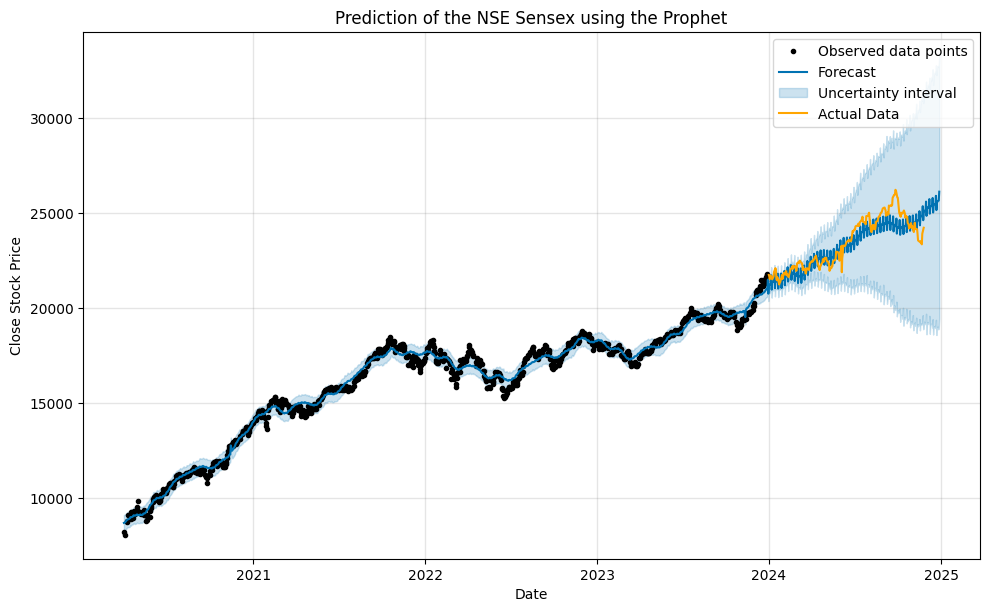

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
#we are predicting 1 year i.e. 365 days
pred_period = 365; # days since data is sampled in day format
future = m.make_future_dataframe(periods=pred_period)
prediction = m.predict(future)
fig = m.plot(prediction)
ax = fig.gca()
test_df['Date'] = pd.to_datetime(test_df['Date'])
ax.plot(test_df['Date'], test_df['Close'], color='orange', label='Actual Data')
plt.title("Prediction of the NSE Sensex using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.legend()
plt.show()

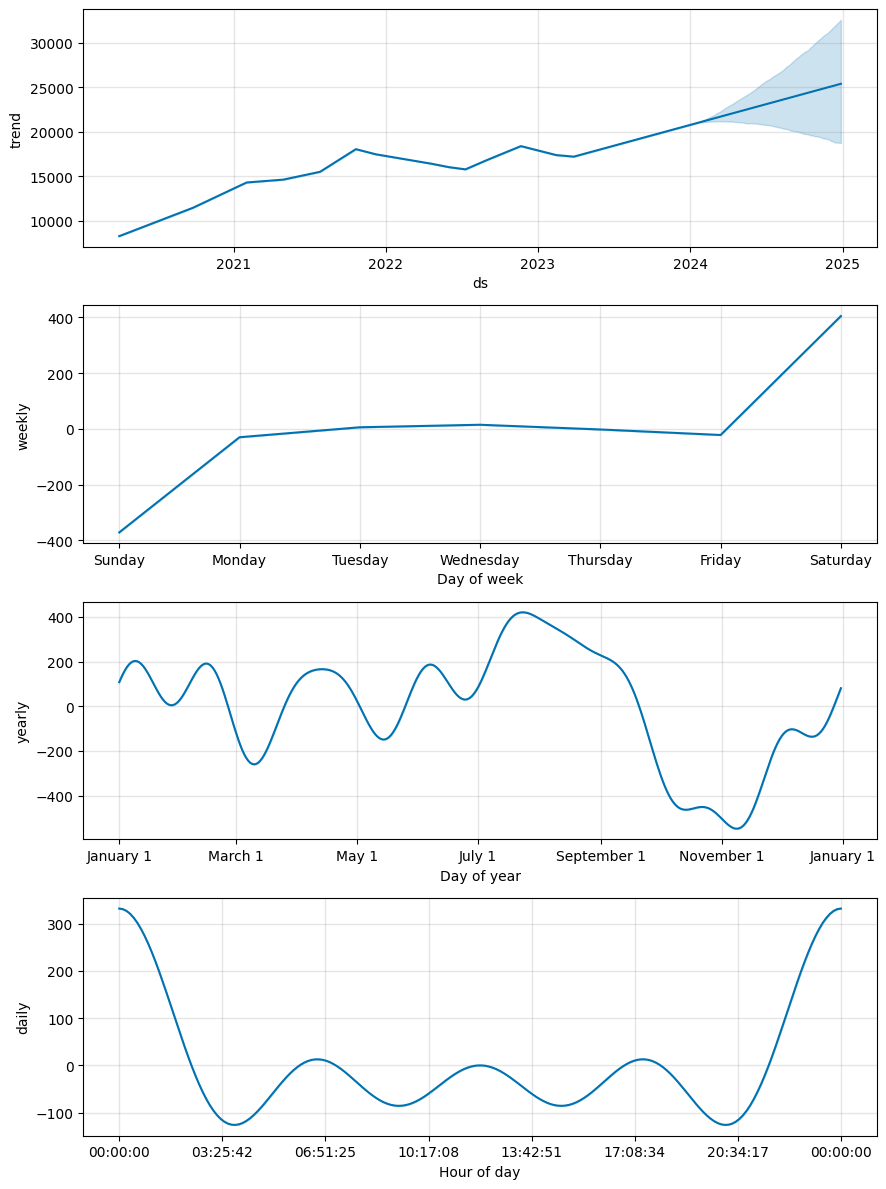

In [ ]:
m.plot_components(prediction)
plt.show()

In [ ]:
print(prediction[['ds', 'yhat']])

             ds          yhat
0    2020-04-01   8708.559912
1    2020-04-03   8726.791047
2    2020-04-07   8849.753261
3    2020-04-08   8880.261879
4    2020-04-09   8884.035206
...         ...           ...
1290 2024-12-24  25582.338211
1291 2024-12-25  25623.005119
1292 2024-12-26  25639.310868
1293 2024-12-27  25653.993480
1294 2024-12-28  26115.952101

[1295 rows x 2 columns]


          Date          yhat     Close   Difference
0   2024-01-01  21133.841004  21741.90  -608.058996
1   2024-01-02  21203.639347  21665.80  -462.160653
2   2024-01-03  21245.337518  21517.35  -272.012482
3   2024-01-04  21259.162130  21658.60  -399.437870
4   2024-01-05  21267.837492  21710.80  -442.962508
..         ...           ...       ...          ...
219 2024-11-18  24726.212300  23453.80  1272.412300
220 2024-11-19  24798.871822  23518.50  1280.371822
221 2024-11-21  24868.172855  23349.90  1518.272855
222 2024-11-22  24887.733928  23907.25   980.483928
223 2024-11-25  24995.952691  24221.90   774.052691

[224 rows x 4 columns]
Mean Difference: -226.64475275144608


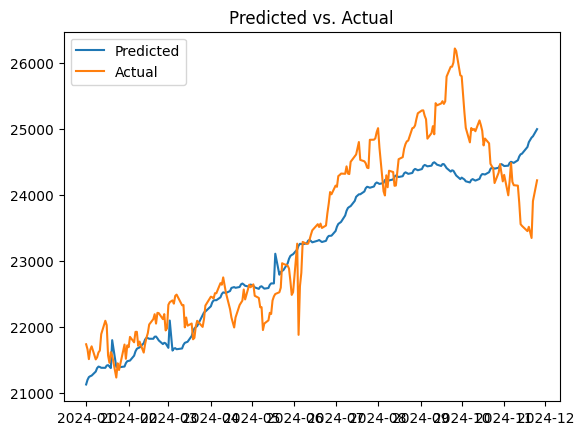

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Aligning Dates
prediction = prediction.rename(columns={'ds': 'Date'})
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Merging Dataframes
comparison_df = pd.merge(prediction[['Date', 'yhat']], test_df[['Date', 'Close']], on='Date', how='inner')

# Calculating Differences
comparison_df['Difference'] = comparison_df['yhat'] - comparison_df['Close']
print(comparison_df)

# Printing mean difference
mean_diff = comparison_df['Difference'].mean()
print(f"Mean Difference: {mean_diff}")

# Ploting predicted vs. actual
plt.plot(comparison_df['Date'], comparison_df['yhat'], label='Predicted')
plt.plot(comparison_df['Date'], comparison_df['Close'], label='Actual')
plt.legend()
plt.title("Predicted vs. Actual")
plt.show()

In [ ]:
# Finding out RMSE Error from prediction to actual values
from sklearn.metrics import mean_squared_error
import numpy as np

prediction = prediction.set_index('Date')
test_df = test_df.set_index('Date')

# Merging Dataframes
comparison_df = pd.merge(prediction[['yhat']], test_df[['Close']], left_index=True, right_index=True, how='inner')

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(comparison_df['Close'], comparison_df['yhat']))
print(f"RMSE: {rmse}")

RMSE: 587.9785992827977


In [ ]:
# Cross Validating
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics


In [ ]:
# Initial training period (minimum data needed to start forecasting)
initial = '540 days'  # After research come up with these value

# Period to forecast into the future (horizon)
period = '30 days'   # Monthly forcasting

# How often to retrain the model (frequency of cutoffs)
horizon = '5 days'    # retrain after each week working days

In [ ]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:prophet:Making 28 forecasts with cutoffs between 2021-10-05 00:00:00 and 2023-12-24 00:00:00


  0%|          | 0/28 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ns0fof8/4e_t7dmo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ns0fof8/zp853c67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=403', 'data', 'file=/tmp/tmp0ns0fof8/4e_t7dmo.json', 'init=/tmp/tmp0ns0fof8/zp853c67.json', 'output', 'file=/tmp/tmp0ns0fof8/prophet_model7ujx9ei4/prophet_model-20241229054334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:43:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:43:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ns0fof8/bk6cfo_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0ns0fof8/gm_w_gjq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/li

In [ ]:
df_p = performance_metrics(df_cv)
print(df_p.head())

  horizon            mse        rmse         mae      mape     mdape  \
0  1 days  365010.187713  604.160730  460.833008  0.025667  0.017894   
1  2 days  360102.433145  600.085355  482.019085  0.026602  0.021143   
2  3 days  381921.127899  617.997676  522.493039  0.029220  0.029782   
3  4 days  347023.234913  589.086780  461.739277  0.025489  0.023963   
4  5 days  335786.575080  579.470944  481.304062  0.026194  0.020566   

      smape  coverage  
0  0.025820  0.588235  
1  0.026785  0.473684  
2  0.029345  0.388889  
3  0.025740  0.500000  
4  0.026264  0.368421  


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


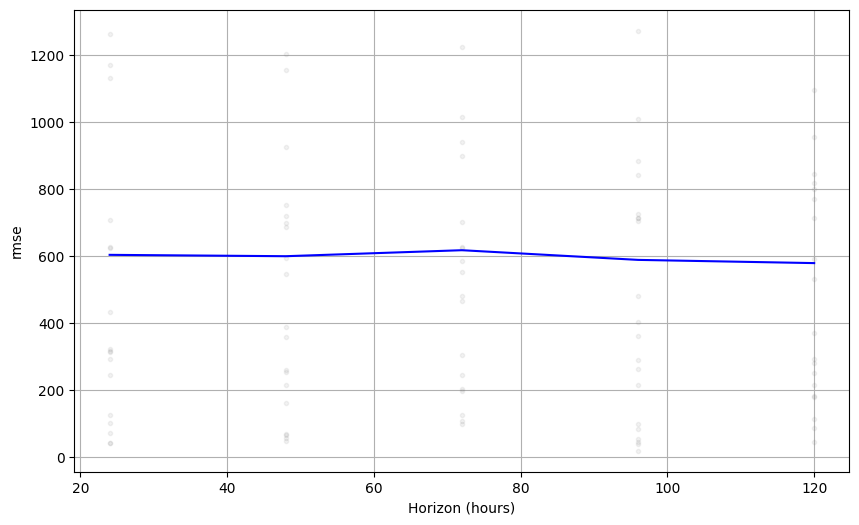

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


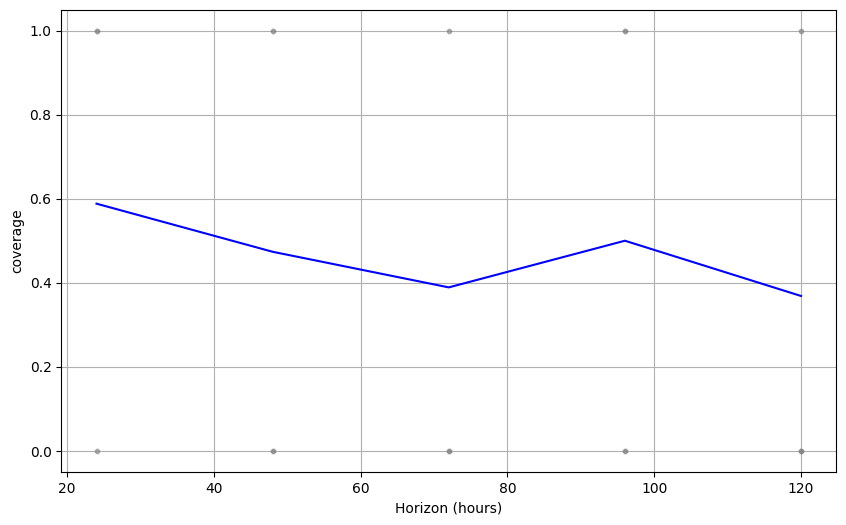

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='coverage')

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Split the data into training and testing sets
df = pd.read_csv('NIFTY_50_2015-2023.csv')
df_test = pd.read_csv('NIFTY_50_2024.csv')
train_data = df[["Date", "Close"]]
test_data = df_test[["Date", "Close"]]
print(test_data)

            Date     Close
0    01-JAN-2024  21741.90
1    02-JAN-2024  21665.80
2    03-JAN-2024  21517.35
3    04-JAN-2024  21658.60
4    05-JAN-2024  21710.80
..           ...       ...
219  18-NOV-2024  23453.80
220  19-NOV-2024  23518.50
221  21-NOV-2024  23349.90
222  22-NOV-2024  23907.25
223  25-NOV-2024  24221.90

[224 rows x 2 columns]


In [ ]:
#HYPOTHESIS TEST:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):

    result=adfuller(sales)

    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['Close'])

ADF Test Statistic : 0.3325307249518533
p-value : 0.9787887267168673
#Lags Used : 7
Number of Observations Used : 2008
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df['Seasonal First Difference']=df['Close']-df['Close'].shift(2)

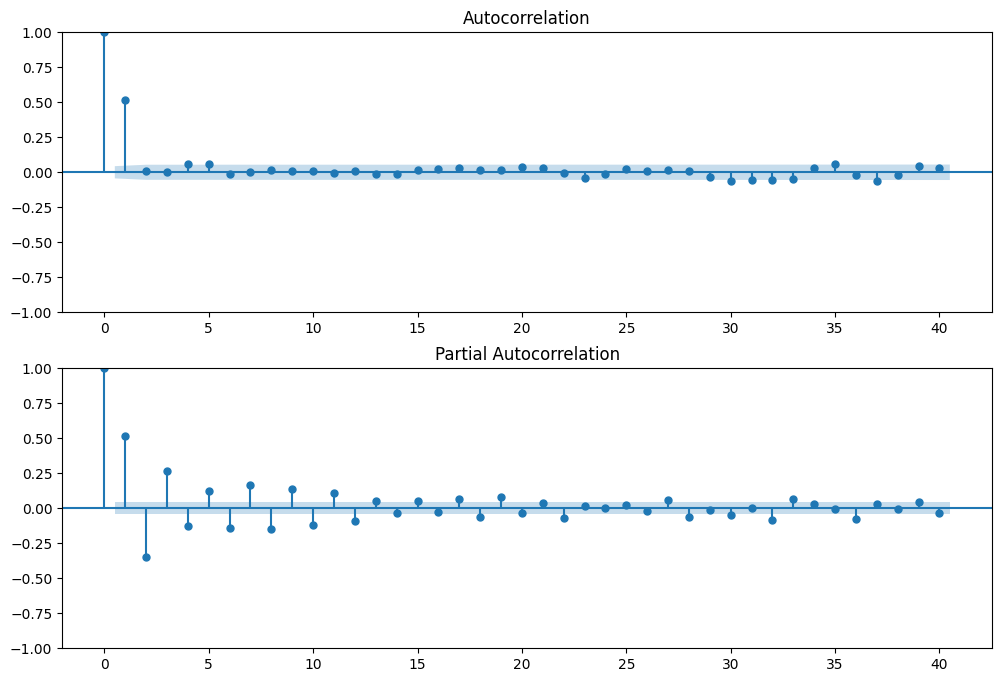

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[2:],lags=40,ax=ax2)

In [ ]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.458020123770866
p-value : 5.446868575396992e-11
#Lags Used : 26
Number of Observations Used : 1987
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:

import statsmodels.api as sm

# Assuming 'data' is your time series data and 'S' is the seasonal period

# Define a range of values for P, D, Q
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
S = 7;

best_model = None
best_aic = float('inf')

train_data = train_data[["Date", "Close"]]
test_data = test_data[["Date", "Close"]]

train_data.set_index('Date', inplace=True)
train_data['Close'] = pd.to_numeric(train_data['Close'], errors='coerce')  # 'coerce' handles non-numeric values


for p in p_values:
    for d in d_values:
        for q in q_values:
            model = sm.tsa.statespace.SARIMAX(train_data['Close'], order=(p, d, q),
                                             seasonal_order=(p, d, q, S), enforce_stationarity=True,
                       enforce_invertibility=True)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_model = results

print(best_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency info

                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 2016
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 7)   Log Likelihood              -12607.557
Date:                           Sun, 29 Dec 2024   AIC                          25233.113
Time:                                   05:46:34   BIC                          25283.557
Sample:                                        0   HQIC                         25251.631
                                          - 2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5596      0.024    -23.779      0.000      -0.606      -0.513
ar.L2         -0.9227      0.022    -41.169

In [ ]:
# Fit the SARIMA model
sarima_model = SARIMAX(train_data['Close'],
                       order=(2, 1, 2),  # AR, differencing, MA orders (p, d, q)
                       seasonal_order=(2, 1, 2, 7),  # Seasonal AR, differencing, MA orders (P, D, Q, S)
                       enforce_stationarity=True,
                       enforce_invertibility=True)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency info

In [ ]:
# Fit the model to the training data
sarima_result = sarima_model.fit()

# Print the model summary
# print(sarima_result.summary())

# Forecast on the test data
# test_forecast = sarima_result.predict(start=test_data.index[0], end=test_data.index[-1])
test_forecast = sarima_result.predict(start=train_data['Close'].shape[0],end=(train_data['Close'].shape[0]+test_data.shape[0]-1), dynamic=False)

# Evaluate the model
mae = mean_absolute_error(test_data['Close'], test_forecast)
print(f'Mean Absolute Error: {mae}')

print(test_forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error: 967.4823839131751
2016    21720.101070
2017    21716.778877
2018    21736.975897
2019    21752.227480
2020    21761.064747
            ...     
2235    23257.452786
2236    23267.095803
2237    23268.821400
2238    23289.010797
2239    23293.588986
Name: predicted_mean, Length: 224, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
dft = pd.DataFrame(test_forecast)
dft.set_index(df_test.index, inplace=True)
print(dft.head())
# plt.plot(test_forecast,index=df_test.index)
# plt.plot(df_test['Close'])

   predicted_mean
0    21720.101070
1    21716.778877
2    21736.975897
3    21752.227480
4    21761.064747


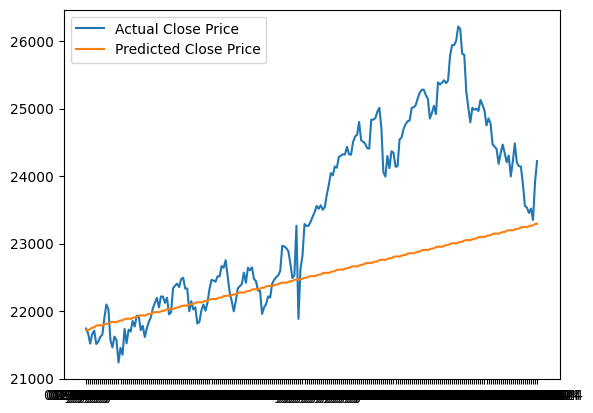

In [ ]:
plt.plot(df_test['Date'], df_test['Close'], label='Actual Close Price')
plt.plot(dft['predicted_mean'], label='Predicted Close Price')
plt.legend()